In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# get campaign dataset ready
cp = pd.read_csv('campaign.csv')

In [5]:
cp.shape

(10022, 10)

In [83]:
# How the raw file is structured
cp.head()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True


In [7]:
# Summary of each column
cp.describe()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
count,10022,10021,10022,10022,10022,10022,10022,1856,577,1856
unique,7294,31,5,2,2,4,7,31,115,2
top,a100000882,1/15/2018,House Ads,control,False,English,19-24 years,1/16/2018,4/2/2018,True
freq,12,789,4733,5076,8946,9260,1679,163,15,1279


In [8]:
# datatype
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10022 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   test_control        10022 non-null  object
 4   converted           10022 non-null  bool  
 5   language_preferred  10022 non-null  object
 6   age_group           10022 non-null  object
 7   date_subscribed     1856 non-null   object
 8   date_canceled       577 non-null    object
 9   is_retained         1856 non-null   object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


#### *For the columns 'date_subscibed', 'date_canceled', and 'is_retained', there are only 1856, 577 and 1856 non-null objects respectively, which means, for a major part of the dataset, these values do not have records. We will mention this again in the convertaion rate and retention rate analysis*  ####

# Campaign Result Overview

### **0. basic campaign info**

In [56]:
# Total number of users who received the offer
total_users = cp['user_id'].nunique()
total_users

7294

### **1. Channel Analysis**

In [10]:
# Channels involved in the campaign in the order of size of traffic
    # size of traffic: reveals how many people reached your campaign through this channel
marketing_channels=cp['marketing_channel'].value_counts()
marketing_channels

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [11]:
marketing_channels_dict = marketing_channels.to_dict()
marketing_channels_dict 

{'House Ads': 4733,
 'Instagram': 1871,
 'Facebook': 1860,
 'Push': 993,
 'Email': 565}

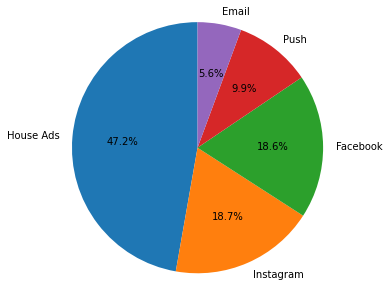

In [12]:
# Percentage of each channel and the visialization
labels = list(marketing_channels_dict.keys())
sizes = list(marketing_channels_dict.values())
    
fig, ax = plt.subplots(figsize = (5,5))
wedges, texts, autotexts = ax.pie(sizes,
                                 autopct = '%1.1f%%',
                                 labels=labels,
                                 startangle = 90
                                 )
ax.axis('equal')

plt.show()

### **2. Daily Active Users Trend**

In [13]:
daily_users = cp.groupby(['date_served'])['user_id'].nunique()
daily_users

date_served
1/1/2018     362
1/10/2018    337
1/11/2018    310
1/12/2018    301
1/13/2018    306
1/14/2018    305
1/15/2018    767
1/16/2018    388
1/17/2018    369
1/18/2018    318
1/19/2018    305
1/2/2018     374
1/20/2018    311
1/21/2018    229
1/22/2018    178
1/23/2018    172
1/24/2018    190
1/25/2018    184
1/26/2018    222
1/27/2018    320
1/28/2018    320
1/29/2018    319
1/3/2018     348
1/30/2018    317
1/31/2018    340
1/4/2018     323
1/5/2018     319
1/6/2018     308
1/7/2018     275
1/8/2018     312
1/9/2018     312
Name: user_id, dtype: int64

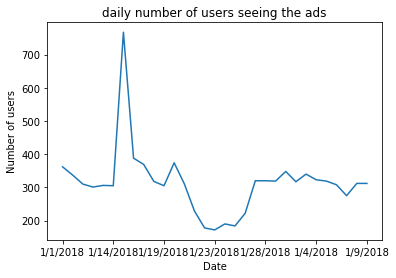

In [14]:
daily_users.plot()

plt.title('daily number of users seeing the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()

### **3. Conversion Rate**
Conversion Rate = Total number of people who converted / Total number of people who received offers

>**Total Conversion**

In [15]:
# Toal number of users engaged in the campaign
cp['user_id'].nunique()

7294

In [16]:
# Check for missing values
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10022 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   test_control        10022 non-null  object
 4   converted           10022 non-null  bool  
 5   language_preferred  10022 non-null  object
 6   age_group           10022 non-null  object
 7   date_subscribed     1856 non-null   object
 8   date_canceled       577 non-null    object
 9   is_retained         1856 non-null   object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


In [17]:
cp.isnull().sum()

user_id                  0
date_served              1
marketing_channel        0
test_control             0
converted                0
language_preferred       0
age_group                0
date_subscribed       8166
date_canceled         9445
is_retained           8166
dtype: int64

***For those users who have not subsriced (not converted), the column 'date subscribed', 'date_canceled', and 'is_retained' are all null.***

In [18]:
# Every ads shown that failed to convert the viewing user
offer_not_converting=cp[cp['date_subscribed'].isnull()]
offer_not_converting

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
1815,a100000004,1/1/2018,House Ads,control,False,English,0-18 years,NaN,NaN,NaN
1816,a100000013,1/1/2018,Push,control,False,English,19-24 years,NaN,NaN,NaN
1817,a100000022,1/1/2018,Facebook,control,False,English,24-30 years,NaN,NaN,NaN
1818,a100000022,1/16/2018,Facebook,control,False,English,24-30 years,NaN,NaN,NaN
1819,a100000025,1/1/2018,Instagram,control,False,English,30-36 years,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9976,a100007249,1/4/2018,House Ads,control,False,English,45-55 years,NaN,NaN,NaN
9977,a100007250,1/5/2018,Facebook,control,False,English,55+ years,NaN,NaN,NaN
9978,a100007251,1/6/2018,Instagram,control,False,English,0-18 years,NaN,NaN,NaN
9979,a100007252,1/7/2018,House Ads,control,False,Spanish,19-24 years,NaN,NaN,NaN


In [19]:
# The number of unconverted users
unconverted_users = offer_not_converting['user_id'].nunique()
unconverted_users

6274

In [55]:
# The conversion rate of all campaign channels combined
# Total
converted_total=total_users-unconverted_users
conversion_total = round((converted_total/total_users)*100,2)
'The conversion rate of all channels combined is {}%'.format(conversion_total)

'The conversion rate of all channels combined is 13.98%'

>**Conversion Rate by Channel**

In [29]:
# Number of users converted in each channel
converted_bychannel_num=cp[cp['converted']==True].groupby('marketing_channel')['user_id'].nunique()
converted_bychannel_num

marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [38]:
# Conversion rate by channel
conversion_bychannel=converted_bychannel_num/cp.groupby(['marketing_channel'])['user_id'].nunique()
conversion_bychannel

marketing_channel
Email        0.338156
Facebook     0.125711
House Ads    0.075101
Instagram    0.133333
Push         0.079218
Name: user_id, dtype: float64

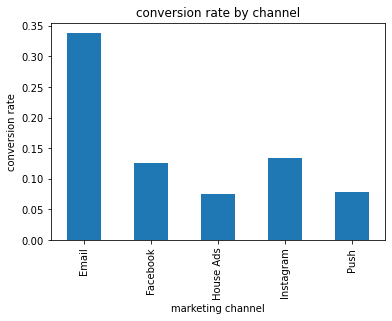

In [42]:
# Visualization the conversion rate

conversion_bychannel.plot(kind='bar')

plt.title('conversion rate by channel')
plt.xlabel('marketing channel')
plt.ylabel('conversion rate')
plt.show()

### **4. Retention Rate**
Retention Rate = Total number of people who remained/Total number of people who converted 

>Total Retention

In [45]:
# Total number of users retained through campaign
retained_total=cp[cp['is_retained']==True]['user_id'].nunique()
retained_total

678

In [54]:
# Retention rate all channels combined
retention_total=round((retained_total/converted_total)*100,2)
'The conversion rate of all channels combined is {}%'.format(retention_total)

'The conversion rate of all channels combined is 66.47%'

>Retention Rate by Channel

In [64]:
# Numbers of users retained through each campaign channel
retained_bychannel_num = cp[cp['is_retained']==True].groupby('marketing_channel')['user_id'].nunique()
retained_bychannel_num

marketing_channel
Email        139
Facebook     211
House Ads    378
Instagram    198
Push          95
Name: user_id, dtype: int64

In [67]:
# Retention rate: error
# NOTE: you can notice the error as both House Ads and Push have retention rate > 1
retained_bychannel_num/converted_bychannel_num

marketing_channel
Email        0.743316
Facebook     0.954751
House Ads    1.268456
Instagram    0.853448
Push         1.233766
Name: user_id, dtype: float64

>>**Error**: 
>>if we simply divide #retained users and #converted users which were both calculated before, the retention rate is not correct
This is because retention is a status signal for one user, so it will be the same for each user across all channels.
<br>
<br>
Each converted user is, however, only converted through one channel. For example, this person clicks on push ads and then decides to enroll. Then this person is converted through push ads, which means 'is_converted' is only TRUE for push channel, but his status in 'is_retained' will be TRUE across all marketing channel.
<br>
<br>
This means the real retention number should be lower

>>>**Investigation:**
>>Look at the table detail, and find out all the offers where (1) the user is retained but (2) not converted in this particular channel

In [74]:
# All offers meet the criteria above
cp.loc[(cp['converted']==False) & (cp['is_retained']==True)]

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
22,a100000050,1/1/2018,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True
24,a100000051,1/1/2018,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True
26,a100000052,1/1/2018,House Ads,personalization,False,English,36-45 years,1/2/2018,NaN,True
28,a100000053,1/1/2018,House Ads,personalization,False,English,45-55 years,1/2/2018,NaN,True
30,a100000054,1/1/2018,House Ads,personalization,False,English,55+ years,1/2/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
9985,a100007258,1/15/2018,Email,personalization,False,German,24-30 years,1/15/2018,NaN,True
9993,a100007266,1/16/2018,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True
10005,a100007278,1/16/2018,Email,control,False,German,0-18 years,1/16/2018,NaN,True
10019,a100007292,1/5/2018,Instagram,control,False,German,55+ years,1/17/2018,NaN,True


>>>Look at a few individuals

In [78]:
# customer a100000050
# received two offers on House Ads, and was converted through the second offer
cp.loc[cp['user_id']== 'a100000050']

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,1/2/2018,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,1/1/2018,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True


In [79]:
# customer a100000051
# first received offer through Push, failed to be converted
# then received offer through House Ads, and converted
# this is the aforementioned case that caused the error
cp.loc[cp['user_id']== 'a100000051']

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
23,a100000051,1/2/2018,House Ads,personalization,True,English,30-36 years,1/2/2018,NaN,True
24,a100000051,1/1/2018,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True


In [95]:
cp['is_retained'].mask(cp['converted']==False, inplace=True)

In [98]:
cp.loc[cp['user_id']== 'a100000050']

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,1/2/2018,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,1/1/2018,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,NaN


In [106]:
# The correct retention number for each channel
# Now the retained user is converted through the same channel
retained_bychannel_num2 = cp.loc[cp['is_retained']==True].groupby(['marketing_channel'])['user_id'].nunique()
retained_bychannel_num2

marketing_channel
Email        118
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [105]:
retained_bychannel_num2/converted_bychannel_num

marketing_channel
Email        0.631016
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

>>**Conclusion: The most effective channel is Push (the channel managed to retain 70% of users it has converted).
In other words, we can say that Push channel has the highest user stickiness**

### **5. Customer Segmentation Analysis**

> Languages

In [114]:
# Number of converted users speaking the language 
language_age_convert=cp.loc[cp['converted']==True].groupby(['language_preferred','age_group'])['user_id'].nunique()
language_age_convert

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

In [117]:
# Make the table easier to look at
table = language_age_convert.unstack(level=1)
table

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,4.0,2.0,8.0,NaN,1.0,3.0,1.0
English,168.0,281.0,201.0,69.0,65.0,61.0,66.0
German,13.0,14.0,17.0,3.0,4.0,6.0,2.0
Spanish,7.0,6.0,2.0,5.0,4.0,5.0,7.0


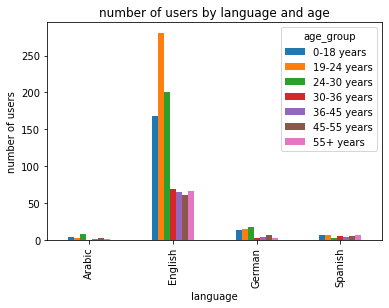

In [119]:
table.plot(kind='bar')

plt.title('number of users by language and age')
plt.xlabel('language')
plt.ylabel('number of users')
plt.show()

# A/B Testing

In a typical A/B testing setting, you would create and test two or more versions of marketing strategies for their effectiveness in achieving your marketing goal. 

Here is a case where your goal is to improve marketing email open rates. 

The hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. 

You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions.

In [120]:
from scipy import stats

In [122]:
cp['test_control'].value_counts()

control            5076
personalization    4946
Name: test_control, dtype: int64

Focus on the Email channel

In [124]:
email = cp.loc[cp['marketing_channel']=='Email']
email

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
354,a100000526,1/1/2018,Email,personalization,True,Arabic,0-18 years,1/1/2018,NaN,True
358,a100000530,1/5/2018,Email,personalization,True,Arabic,19-24 years,1/5/2018,NaN,True
362,a100000534,1/9/2018,Email,personalization,False,English,45-55 years,1/9/2018,NaN,NaN
366,a100000538,1/13/2018,Email,personalization,True,Arabic,24-30 years,1/13/2018,1/23/2018,False
370,a100000542,1/17/2018,Email,personalization,True,English,0-18 years,1/17/2018,2/12/2018,False
...,...,...,...,...,...,...,...,...,...,...
10015,a100007288,1/17/2018,Email,control,True,German,30-36 years,1/17/2018,4/26/2018,False
10016,a100007289,1/17/2018,Email,control,True,German,36-45 years,1/17/2018,1/27/2018,False
10017,a100007290,1/17/2018,Email,control,True,German,45-55 years,1/17/2018,1/24/2018,False
10018,a100007291,1/17/2018,Email,control,True,German,55+ years,1/17/2018,NaN,True


In [126]:
# Numbers of people convered in each group
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()

test_control
control             76
personalization    111
Name: user_id, dtype: int64

In [127]:
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()\
/email.groupby(['test_control'])['user_id'].nunique()

test_control
control            0.281481
personalization    0.390845
Name: user_id, dtype: float64

**The lift:**

(Test conversion rate - Control conversion rate)/Control conversion rate

In [128]:
(0.390845-0.281481)/0.281481

0.38853066459192637